# CSC 295-002 – Project 3: Housing Market Analysis  
**Name**: Kashyap Subramanian 
**Date**: 17th April, 2025

This project analyzes the change in housing prices, rental costs, college tuition, and the Consumer Price Index (CPI) over the past 25 years. The goal is to compare trends and growth rates across different sectors and cities.


In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings

warnings.filterwarnings('ignore')

In [31]:
# Load the housing price data
homes_df = pd.read_csv('Metro_zhvi_homes_smoothed_2025.csv')

# Load the tuition data (tab-separated)
tuition_df = pd.read_csv('college_tuition_data.tsv', sep='\t')

# Load the rental data
rentals_df = pd.read_csv('Metro_zori_monthly_rentals_smoothed_2025.csv')

# Load the CPI data
cpi_df = pd.read_csv('cpi.csv')

In [32]:
# Preview the housing data
homes_df.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,1/31/00,2/29/00,3/31/00,4/30/00,5/31/00,...,5/31/24,6/30/24,7/31/24,8/31/24,9/30/24,10/31/24,11/30/24,12/31/24,1/31/25,2/28/25
0,102001,0,United States,country,NaN,120187.2913,120398.7393,120660.9659,121223.3906,121870.6739,...,352914.6387,353466.9970,353612.5984,353851.9620,354295.1432,354873.9914,355358.9167,356067.0588,356686.3517,357138.1323
1,394913,1,"New York, NY",msa,NY,215997.9795,216915.8491,217842.2198,219719.4052,221663.2957,...,655775.1935,658849.7126,661590.7513,665325.9004,669344.3025,672861.2829,675626.1944,677406.7469,678476.2636,679755.7464
2,753899,2,"Los Angeles, CA",msa,CA,223845.4782,224678.4674,225788.0011,227995.6003,230410.0218,...,939338.7721,943348.1639,947786.8309,953046.6208,959562.4541,964859.3465,969423.1724,973502.5354,974045.9703,971995.7539
3,394463,3,"Chicago, IL",msa,IL,150668.7531,150808.2284,151073.8618,151734.6914,152529.5900,...,314546.3933,315749.0919,316472.7731,317379.3330,318365.9051,319327.3197,320348.4760,321575.0067,322895.8684,324218.2098
4,394514,4,"Dallas, TX",msa,TX,126168.3871,126224.5830,126289.1858,126456.9527,126678.1487,...,375056.8538,374392.0299,373452.8071,372801.1335,372603.2347,372497.3215,372208.9255,371684.8170,371161.9013,370383.5072


In [33]:
# Filter for Raleigh, Greensboro, and San Francisco
selected_cities = ['Raleigh, NC', 'Greensboro, NC', 'San Francisco, CA']

# Keep only rows for selected cities
homes_filtered = homes_df[homes_df['RegionName'].isin(selected_cities)]

# Drop unnecessary columns (e.g., RegionID, SizeRank, etc.)
homes_filtered = homes_filtered.drop(columns=['RegionID', 'SizeRank', 'RegionType', 'StateName'])

# Set RegionName as index (optional for cleaner reshaping)
homes_filtered = homes_filtered.set_index('RegionName')

# Transpose so rows = dates and columns = cities
homes_transposed = homes_filtered.transpose()

# Convert index (which are dates in string format) to datetime
homes_transposed.index = pd.to_datetime(homes_transposed.index)

# Rename columns for easier access
homes_transposed.columns = ['Raleigh', 'Greensboro', 'SanFrancisco']

# Preview cleaned data
homes_transposed.head()

,Raleigh,Greensboro,SanFrancisco
2000-01-31,291497.3945,170811.5101,106754.9099
2000-02-29,292637.6735,170877.3616,106941.3279
2000-03-31,294375.5608,171175.0692,107091.6748
2000-04-30,299090.2204,171736.3453,107449.9066
2000-05-31,305587.8607,172557.4677,107807.8454


In [34]:
# Preview tuition data
tuition_df.head()

,Year,All,4-Year,2-Year,All.1,4-Year.1,2-Year.1,All.2,4-Year.2,2-Year.2,...,2-Year.4,All.5,4-Year.5,2-Year.5,All.6,4-Year.6,2-Year.6,All.7,4-Year.7,2-Year.7
0,1963-64,1248,1286,775,508,553,171,282,279,209,...,7535,4939,5369,1664,2743,2707,2032,4444,4421,3839
1,1968-69,1459,1545,1053,596,683,250,360,360,327,...,8847,5011,5741,2104,3027,3026,2747,4218,4217,3997
2,1969-70,1560,1674,1089,645,755,247,389,392,347,...,8642,5118,5990,1963,3088,3109,2752,4170,4186,3927
3,1970-71,1653,1784,1120,688,814,249,419,422,369,...,8452,5190,6139,1882,3160,3183,2787,4118,4139,3783
4,1971-72,1730,1878,1172,724,865,251,445,448,391,...,8533,5271,6302,1827,3240,3266,2847,4091,4106,3860


In [35]:
# Keep only first 4 characters of the Year column (e.g., "1963-64" becomes "1963")
tuition_df['Year'] = tuition_df['Year'].astype(str).str[:4]

# Convert Year to datetime
tuition_df['Year'] = pd.to_datetime(tuition_df['Year'], format='%Y')

# Set Year as index
tuition_df = tuition_df.set_index('Year')

# Preview
tuition_df.head()

,All,4-Year,2-Year,All.1,4-Year.1,2-Year.1,All.2,4-Year.2,2-Year.2,All.3,...,2-Year.4,All.5,4-Year.5,2-Year.5,All.6,4-Year.6,2-Year.6,All.7,4-Year.7,2-Year.7
Year,,,,,,,,,,,,,,,,,,,,,
1963-01-01,1248,1286,775,508,553,171,282,279,209,457,...,7535,4939,5369,1664,2743,2707,2032,4444,4421,3839
1968-01-01,1459,1545,1053,596,683,250,360,360,327,502,...,8847,5011,5741,2104,3027,3026,2747,4218,4217,3997
1969-01-01,1560,1674,1089,645,755,247,389,392,347,526,...,8642,5118,5990,1963,3088,3109,2752,4170,4186,3927
1970-01-01,1653,1784,1120,688,814,249,419,422,369,546,...,8452,5190,6139,1882,3160,3183,2787,4118,4139,3783
1971-01-01,1730,1878,1172,724,865,251,445,448,391,562,...,8533,5271,6302,1827,3240,3266,2847,4091,4106,3860


In [36]:
# Preview rental data
rentals_df.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,1/31/15,2/28/15,3/31/15,4/30/15,5/31/15,...,5/31/24,6/30/24,7/31/24,8/31/24,9/30/24,10/31/24,11/30/24,12/31/24,1/31/25,2/28/25
0,102001,0,United States,country,NaN,1197.135014,1203.668597,1212.639047,1221.659620,1230.896254,...,1952.212690,1963.530556,1972.333743,1976.508015,1977.568303,1973.864441,1970.768273,1967.300532,1971.799915,1980.162671
1,394913,1,"New York, NY",msa,NY,2233.141451,2247.559592,2265.802262,2285.735153,2300.826521,...,3182.280631,3210.356517,3227.624815,3233.030430,3222.421335,3208.121467,3196.671310,3190.753169,3200.395740,3220.610276
2,753899,2,"Los Angeles, CA",msa,CA,1809.922576,1822.546326,1838.656155,1852.451917,1866.850931,...,2907.654651,2921.723436,2935.412053,2941.093233,2945.174113,2942.243481,2938.727400,2931.113174,2952.828971,2975.013379
3,394463,3,"Chicago, IL",msa,IL,1400.342984,1407.136301,1416.670054,1425.972644,1436.236253,...,2021.586545,2039.379377,2048.680609,2051.979728,2050.375128,2048.724488,2050.069392,2053.872732,2061.194046,2077.000461
4,394514,4,"Dallas, TX",msa,TX,1095.378833,1100.367576,1108.336454,1120.217111,1130.017885,...,1746.791703,1753.697018,1760.069195,1762.709157,1759.097054,1751.891152,1743.521853,1736.717800,1735.122854,1740.965116


In [37]:
# Filter for Raleigh, Greensboro, and San Francisco
selected_rent_cities = ['Raleigh, NC', 'Greensboro, NC', 'San Francisco, CA']

# Keep only rows for selected cities
rentals_filtered = rentals_df[rentals_df['RegionName'].isin(selected_rent_cities)]

# Drop unneeded columns
rentals_filtered = rentals_filtered.drop(columns=['RegionID', 'SizeRank', 'RegionType', 'StateName'])

# Set RegionName as index
rentals_filtered = rentals_filtered.set_index('RegionName')

# Transpose
rentals_transposed = rentals_filtered.transpose()

# Convert index (dates) to datetime
rentals_transposed.index = pd.to_datetime(rentals_transposed.index)

# Rename columns for easier access
rentals_transposed.columns = ['Raleigh_Rent', 'Greensboro_Rent', 'SanFrancisco_Rent']

# Preview
rentals_transposed.head()

,Raleigh_Rent,Greensboro_Rent,SanFrancisco_Rent
2015-01-31,2253.610725,1089.740194,831.116940
2015-02-28,2263.568445,1092.690908,834.602713
2015-03-31,2296.237486,1100.139832,837.067482
2015-04-30,2331.064400,1105.929423,842.905435
2015-05-31,2365.621852,1117.865228,847.566280


In [38]:
# Preview CPI data
cpi_df.head()

,DATE,CPIAUCSL
0,1947-01-01,21.48
1,1947-02-01,21.62
2,1947-03-01,22.00
3,1947-04-01,22.00
4,1947-05-01,21.95


In [39]:
cpi_df.columns

Index(['DATE', 'CPIAUCSL'], dtype='object')

In [ ]:

cpi_df['Year'] = pd.to_datetime(cpi_df['Year'])

cpi_df['Year'] = cpi_df['Year'].dt.to_period('Y').dt.to_timestamp()

# Set as index
cpi_df = cpi_df.set_index('Year')

# Preview
cpi_df.head()

KeyError: 'Year'

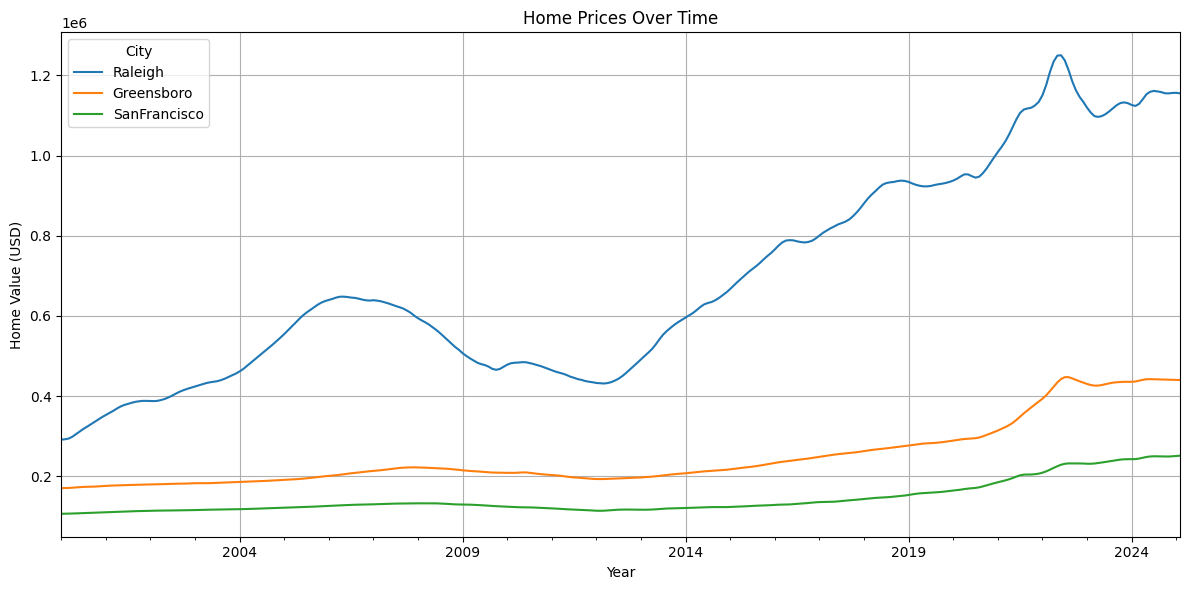

In [ ]:
# Plot home prices
plt.figure(figsize=(12, 6))
homes_transposed.plot(ax=plt.gca())
plt.title('Home Prices Over Time')
plt.xlabel('Year')
plt.ylabel('Home Value (USD)')
plt.legend(title='City')
plt.grid(True)
plt.tight_layout()
plt.show()

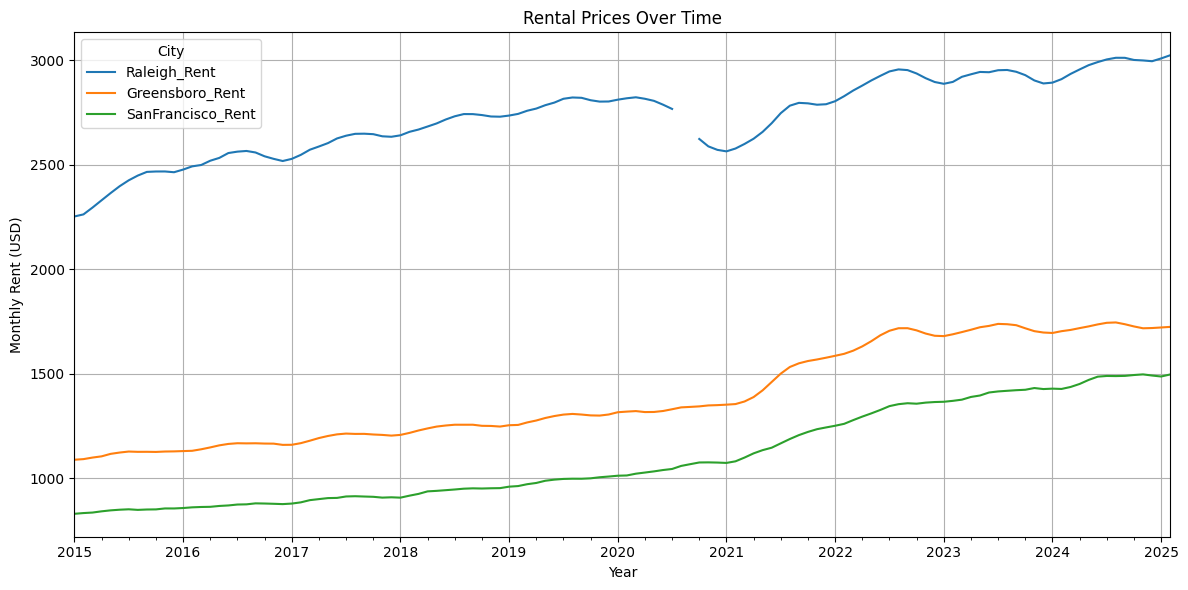

In [ ]:
# Plot rental prices
plt.figure(figsize=(12, 6))
rentals_transposed.plot(ax=plt.gca())
plt.title('Rental Prices Over Time')
plt.xlabel('Year')
plt.ylabel('Monthly Rent (USD)')
plt.legend(title='City')
plt.grid(True)
plt.tight_layout()
plt.show()

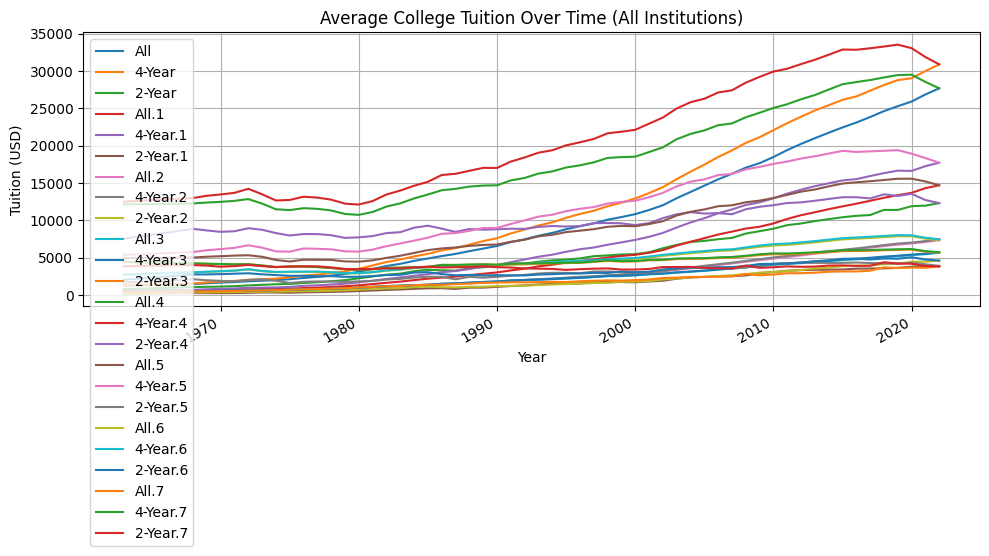

In [ ]:
# Plot tuition
plt.figure(figsize=(10, 5))
tuition_df.plot(ax=plt.gca())
plt.title('Average College Tuition Over Time (All Institutions)')
plt.xlabel('Year')
plt.ylabel('Tuition (USD)')
plt.grid(True)
plt.tight_layout()
plt.show()

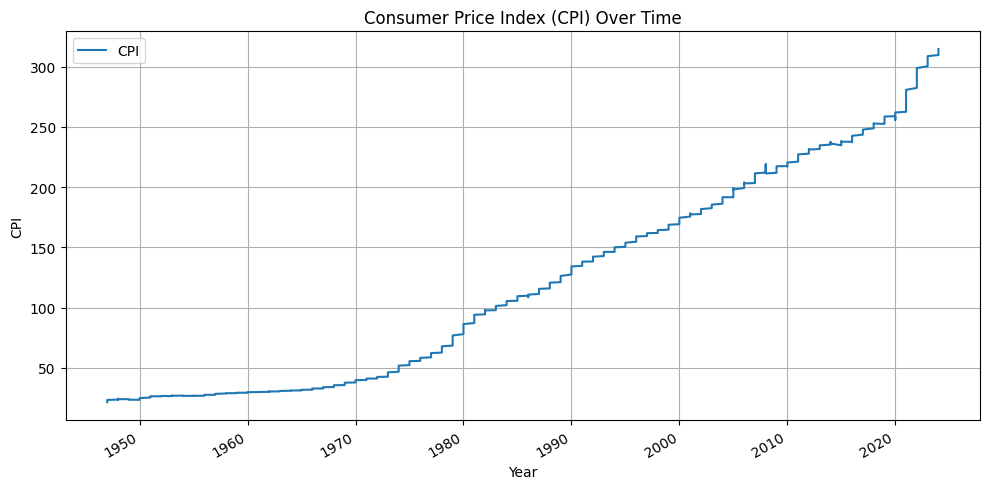

In [ ]:
# Plot CPI
plt.figure(figsize=(10, 5))
cpi_df.plot(ax=plt.gca())
plt.title('Consumer Price Index (CPI) Over Time')
plt.xlabel('Year')
plt.ylabel('CPI')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
homes_pct_change = homes_transposed.pct_change() * 100
homes_pct_change = homes_pct_change.dropna()
homes_pct_change.head()

,Raleigh,Greensboro,SanFrancisco
2000-02-29,0.391180,0.038552,0.174622
2000-03-31,0.593870,0.174223,0.140588
2000-04-30,1.601580,0.327896,0.334509
2000-05-31,2.172468,0.478130,0.333122
2000-06-30,2.207047,0.418896,0.333825


In [ ]:
rentals_pct_change = rentals_transposed.pct_change() * 100
rentals_pct_change = rentals_pct_change.dropna()
rentals_pct_change.head()

,Raleigh_Rent,Greensboro_Rent,SanFrancisco_Rent
2015-02-28,0.441856,0.270772,0.419408
2015-03-31,1.443254,0.681705,0.295322
2015-04-30,1.516695,0.526260,0.697429
2015-05-31,1.482475,1.079256,0.552950
2015-06-30,1.391027,0.567366,0.365003


In [ ]:
tuition_pct_change = tuition_df.pct_change() * 100
tuition_pct_change = tuition_pct_change.dropna()
tuition_pct_change.head()

,All,4-Year,2-Year,All.1,4-Year.1,2-Year.1,All.2,4-Year.2,2-Year.2,All.3,...,2-Year.4,All.5,4-Year.5,2-Year.5,All.6,4-Year.6,2-Year.6,All.7,4-Year.7,2-Year.7
Year,,,,,,,,,,,,,,,,,,,,,
1968-01-01,16.907051,20.139969,35.870968,17.322835,23.508137,46.198830,27.659574,29.032258,56.459330,9.846827,...,17.412077,1.457785,6.928665,26.442308,10.353627,11.784263,35.187008,-5.085509,-4.614341,4.115655
1969-01-01,6.922550,8.349515,3.418803,8.221477,10.541728,-1.200000,8.055556,8.888889,6.116208,4.780876,...,-2.317170,2.135302,4.337223,-6.701521,2.015197,2.742895,0.182017,-1.137980,-0.735120,-1.751313
1970-01-01,5.961538,6.571087,2.846648,6.666667,7.814570,0.809717,7.712082,7.653061,6.340058,3.802281,...,-2.198565,1.406800,2.487479,-4.126337,2.331606,2.380187,1.271802,-1.247002,-1.122790,-3.666921
1971-01-01,4.658197,5.269058,4.642857,5.232558,6.265356,0.803213,6.205251,6.161137,5.962060,2.930403,...,0.958353,1.560694,2.655156,-2.922423,2.531646,2.607603,2.152853,-0.655658,-0.797294,2.035422
1972-01-01,6.011561,8.146965,8.873720,4.834254,9.826590,14.342629,9.662921,9.821429,6.138107,4.448399,...,4.675964,0.872700,5.569660,9.906951,5.401235,5.541947,2.002107,0.464434,0.243546,4.145078


In [ ]:
cpi_pct_change = cpi_df.pct_change() * 100
cpi_pct_change = cpi_pct_change.dropna()
cpi_pct_change.head()

,CPI
Year,
1947-01-01,0.651769
1947-01-01,1.757632
1947-01-01,0.000000
1947-01-01,-0.227273
1947-01-01,0.592255


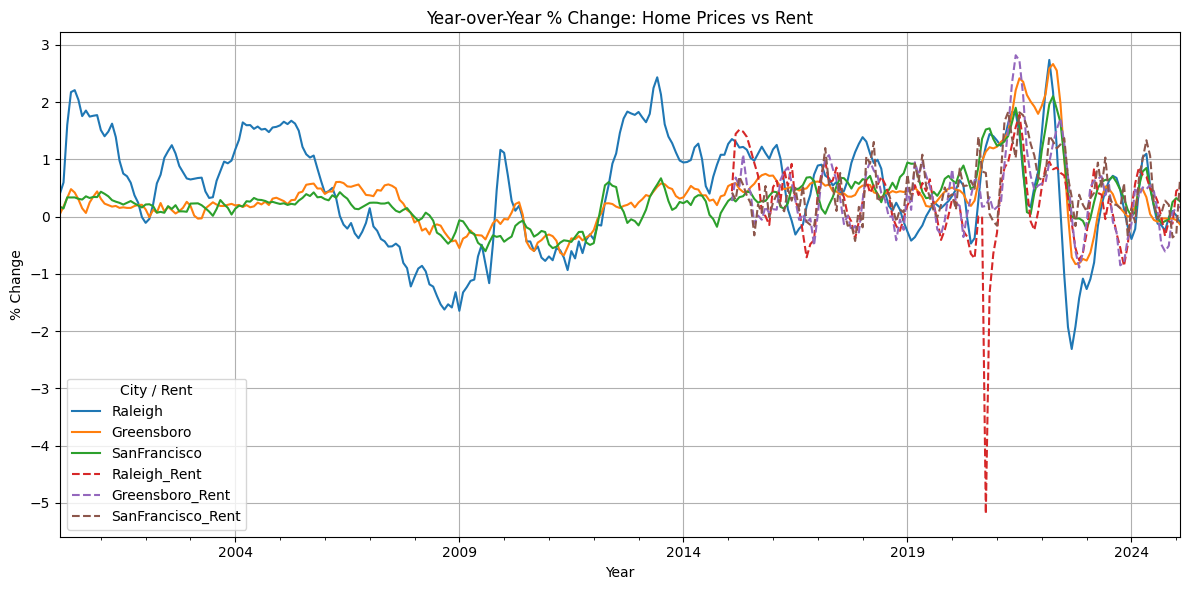

In [ ]:
plt.figure(figsize=(12, 6))
homes_pct_change[['Raleigh', 'Greensboro', 'SanFrancisco']].plot(ax=plt.gca(), linestyle='-')
rentals_pct_change[['Raleigh_Rent', 'Greensboro_Rent', 'SanFrancisco_Rent']].plot(ax=plt.gca(), linestyle='--')
plt.title('Year-over-Year % Change: Home Prices vs Rent')
plt.xlabel('Year')
plt.ylabel('% Change')
plt.legend(title='City / Rent')
plt.grid(True)
plt.tight_layout()
plt.show()

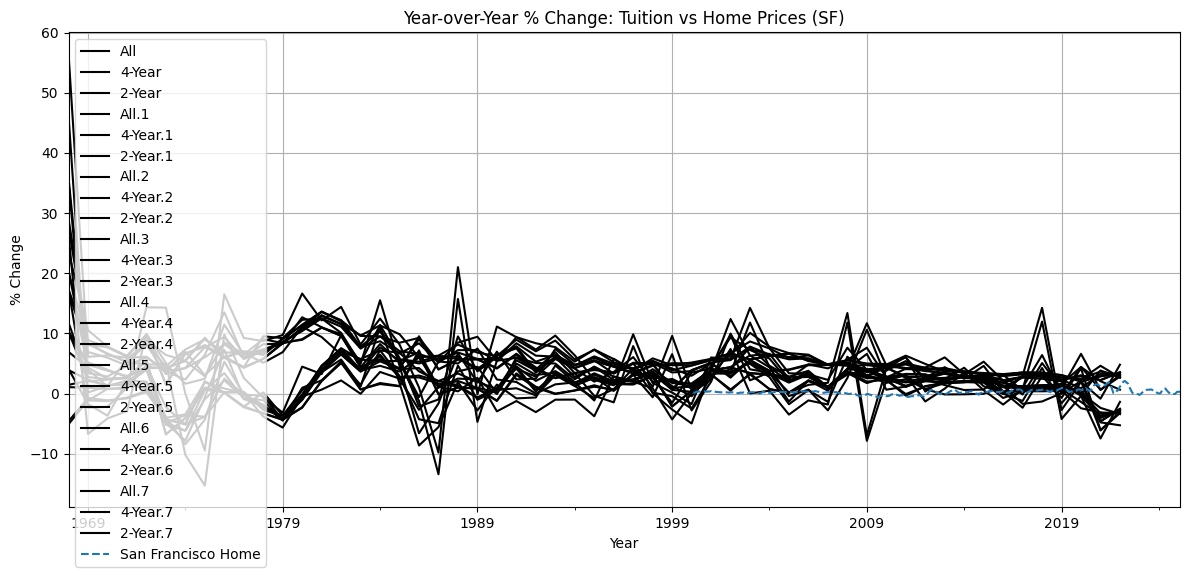

In [ ]:
plt.figure(figsize=(12, 6))
tuition_pct_change.plot(ax=plt.gca(), label='Tuition', color='black')
homes_pct_change['SanFrancisco'].plot(ax=plt.gca(), label='San Francisco Home', linestyle='--')
plt.title('Year-over-Year % Change: Tuition vs Home Prices (SF)')
plt.xlabel('Year')
plt.ylabel('% Change')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

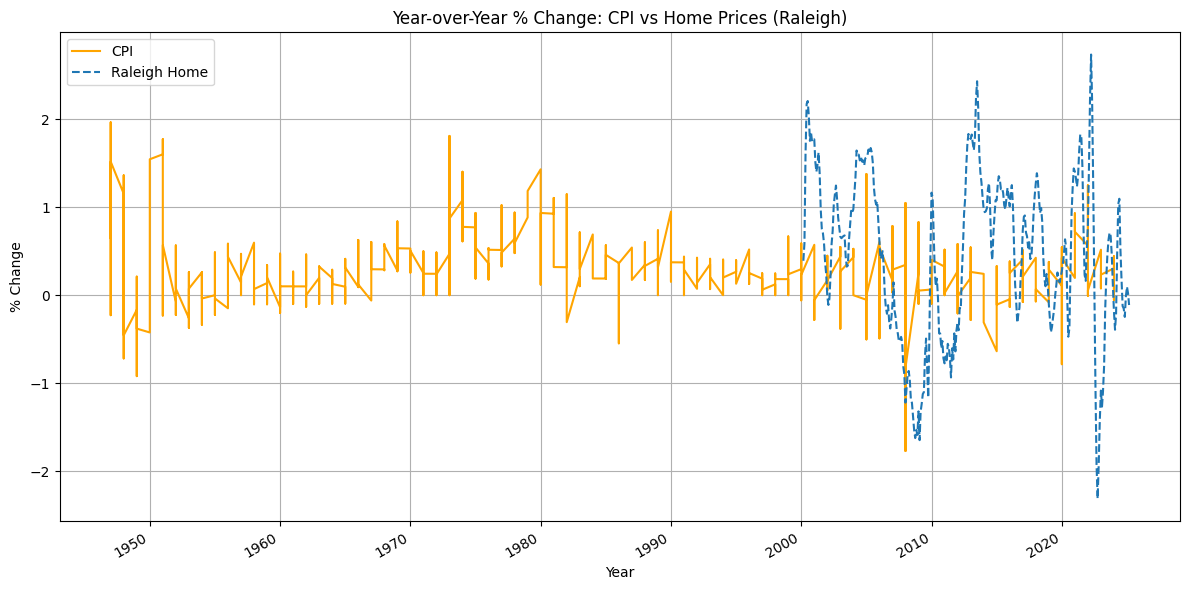

In [ ]:
plt.figure(figsize=(12, 6))
cpi_pct_change.plot(ax=plt.gca(), label='CPI', color='orange')
homes_pct_change['Raleigh'].plot(ax=plt.gca(), label='Raleigh Home', linestyle='--')
plt.title('Year-over-Year % Change: CPI vs Home Prices (Raleigh)')
plt.xlabel('Year')
plt.ylabel('% Change')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Summary of Observations:

- San Francisco home prices were consistently higher and more volatile than Raleigh and Greensboro.
- Rent trends followed similar trajectories as home prices, but with less dramatic spikes.
- Tuition has shown a steady and sharp increase over the years, largely unaffected by housing market trends.
- CPI rose gradually but lagged behind the increases in housing and tuition.
- Percent change plots show that tuition and home prices grew faster than inflation (CPI) in most years.
- Raleigh and Greensboro showed similar behavior with lower volatility compared to San Francisco.

## Reflection

- This project helped me practice data wrangling, merging, and time-series plotting with real datasets.
- The hardest part was cleaning inconsistent date formats and matching different time scales across datasets.
- I learned how to use `pct_change()` to calculate and compare growth rates.
- I also got more comfortable combining multiple plots and cleaning up final visualizations.